In [1]:
import os
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

colors = ['#f9fcfa','#c8ded2','#a3c8b3','#72ab8b','#4d8164','#375d47','#9467bd',"#800080"]
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFA500", "#800080", "#FFFF00"]
colors2 = ['#FEE3A2','#F3C301','#87C159','#058240','#F4B183','#FD292F']

In [2]:
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), sep=";")

# Perform necessary data preprocessing

In [4]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled':2})

# Oversample using SMOTE

In [5]:
X = df.drop('Target', axis=1)
y = df['Target']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data

In [6]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Target'] = y_resampled

#Data Description

In [ ]:
df_resampled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
df.Target.unique(), df.Target.value_counts()

(array([0, 1, 2]),
 1    2209
 0    1421
 2     794
 Name: Target, dtype: int64)

In [ ]:
df.shape

(4424, 37)

In [ ]:
df_resampled.shape

(6627, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df.isnull().mean()

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

# Data Visualization and further analysis with the resampled data

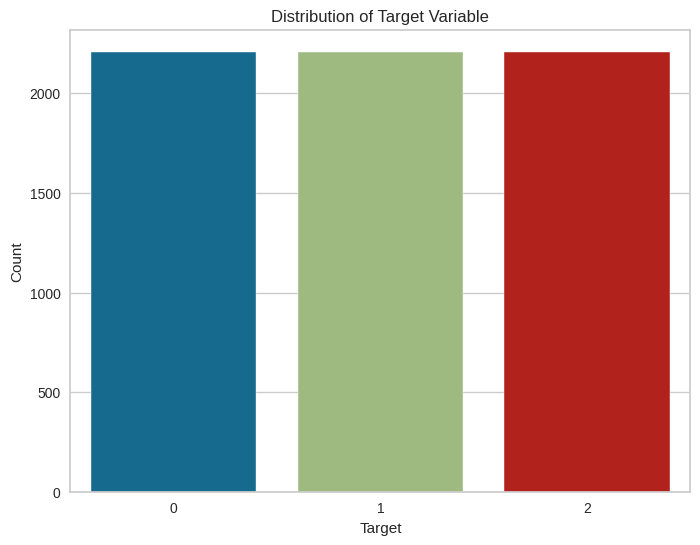

In [ ]:
# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df_resampled)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

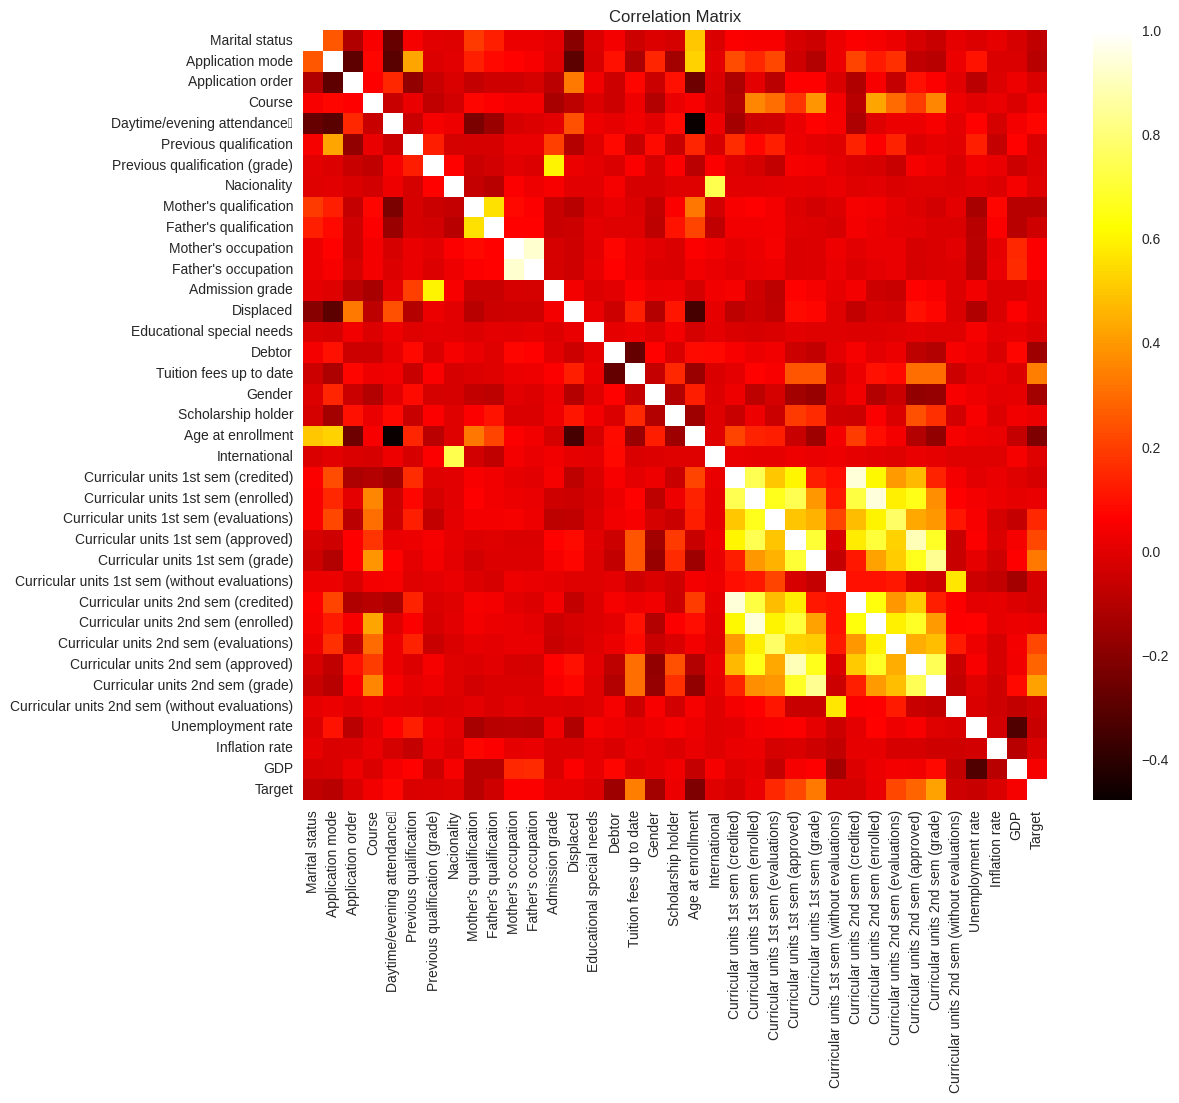

In [ ]:
# Visualize the correlation matrix
corr_matrix = df_resampled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='hot')
plt.title('Correlation Matrix')
plt.show()

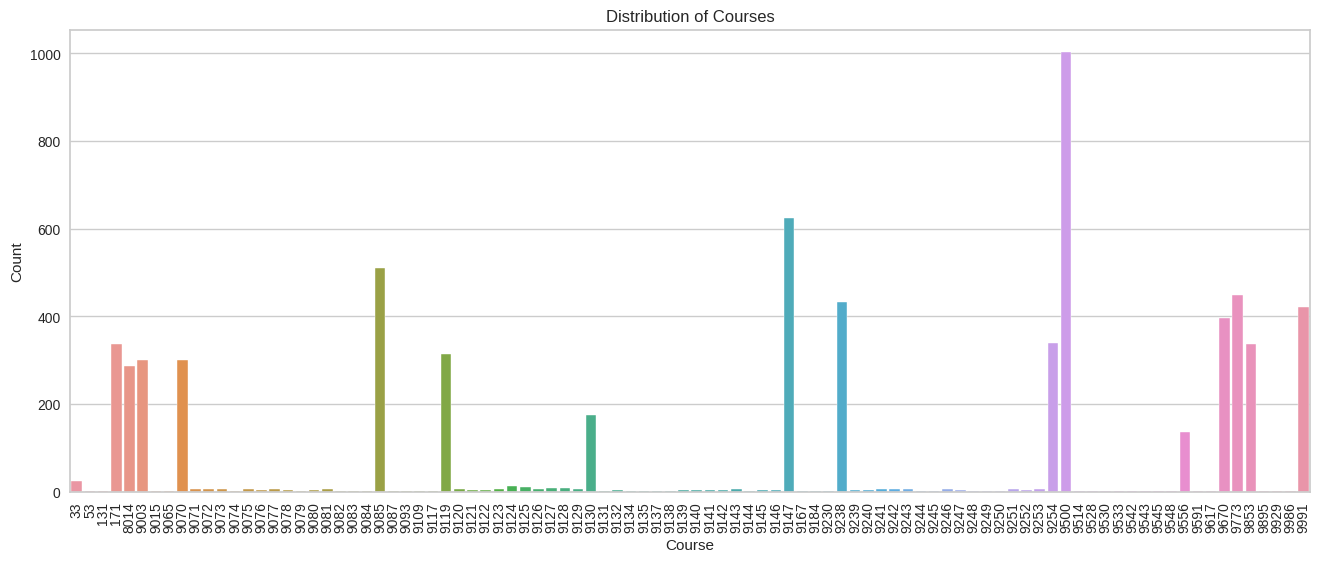

In [ ]:
# Create a bar plot for a categorical variable-##Course
plt.figure(figsize=(16,6))
sns.countplot(x='Course', data=df_resampled)
plt.title('Distribution of Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

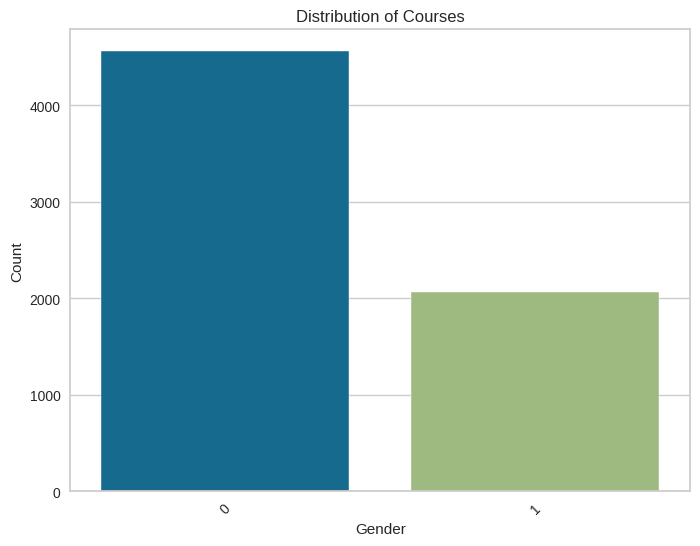

In [ ]:
# Create a bar plot for a categorical variable---Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_resampled)
plt.title('Distribution of Courses')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

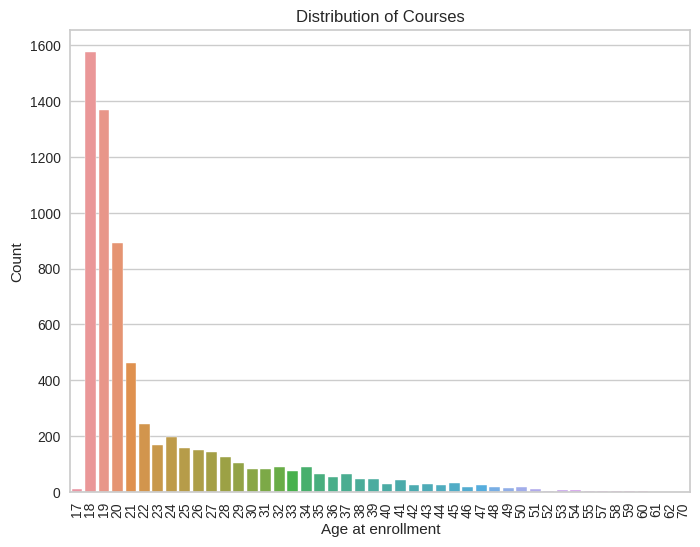

In [ ]:
#Age at enrollment
# Create a bar plot for a categorical variable---Age at enrollment
plt.figure(figsize=(8, 6))
sns.countplot(x='Age at enrollment', data=df_resampled)
plt.title('Distribution of Courses')
plt.xlabel('Age at enrollment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

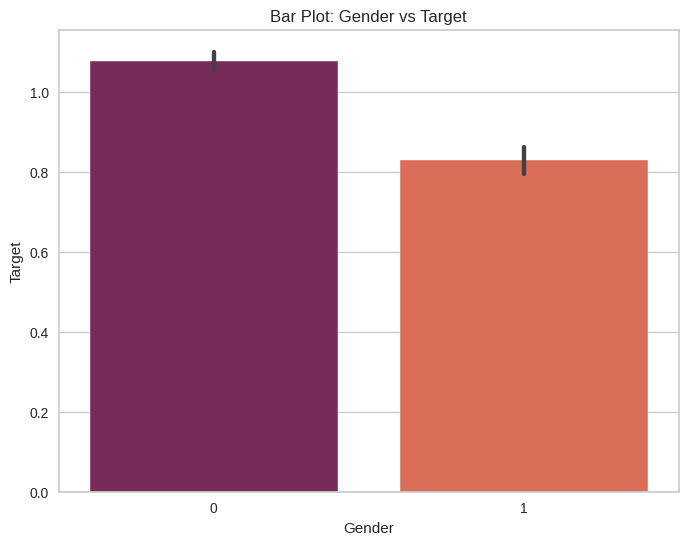

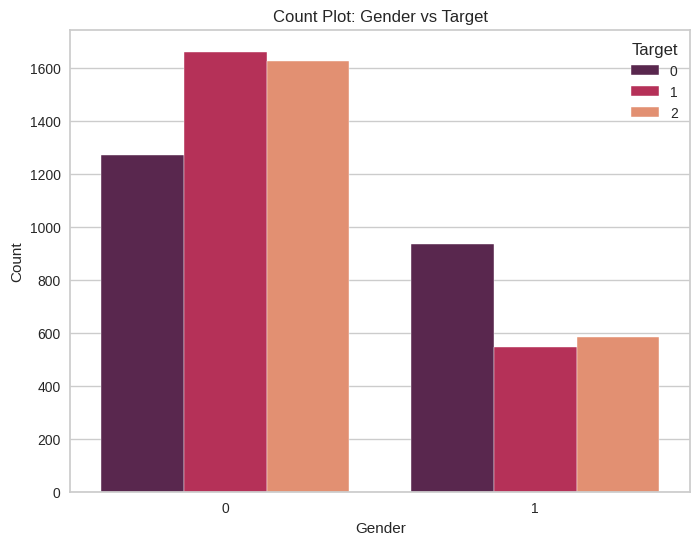

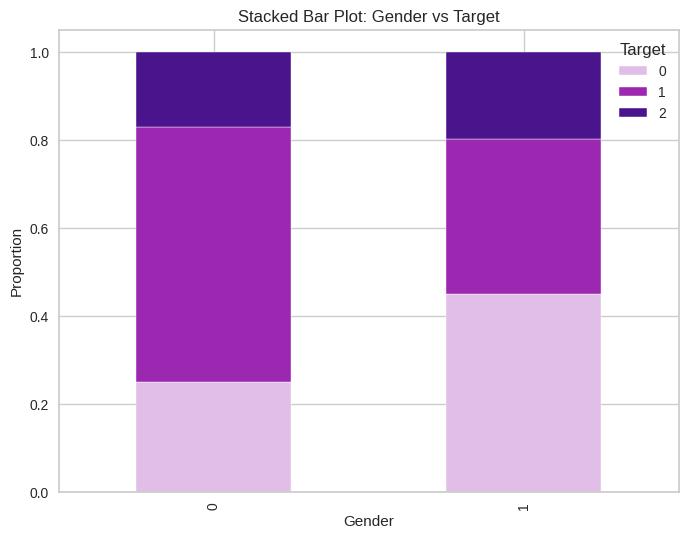

In [ ]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Target", data=df_resampled, palette="rocket")
plt.title("Bar Plot: Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("Target")
plt.show()

# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", hue="Target", data=df_resampled, palette="rocket")
plt.title("Count Plot: Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Stacked bar plot
grouped_df = df.groupby(["Gender", "Target"]).size().unstack()
stacked_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)
stacked_df.plot.bar(stacked=True, figsize=(8, 6), color=["#E1BEE7","#9C27B0","#4A148C"])
plt.title("Stacked Bar Plot: Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Target")
plt.show()

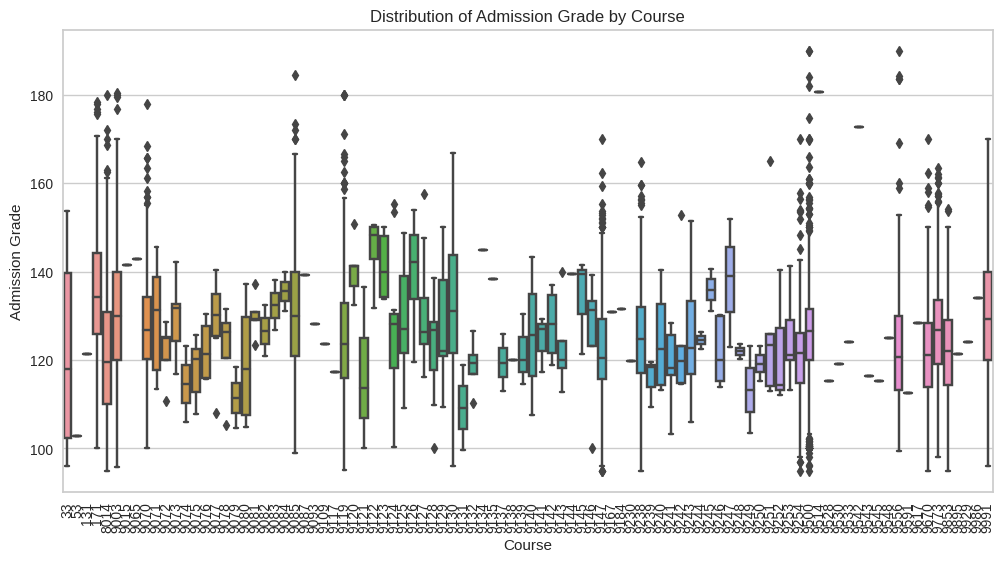

In [ ]:
# Create a box plot for a continuous variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Admission grade', data=df_resampled)
plt.title('Distribution of Admission Grade by Course')
plt.xlabel('Course')
plt.ylabel('Admission Grade')
plt.xticks(rotation=90)
plt.show()

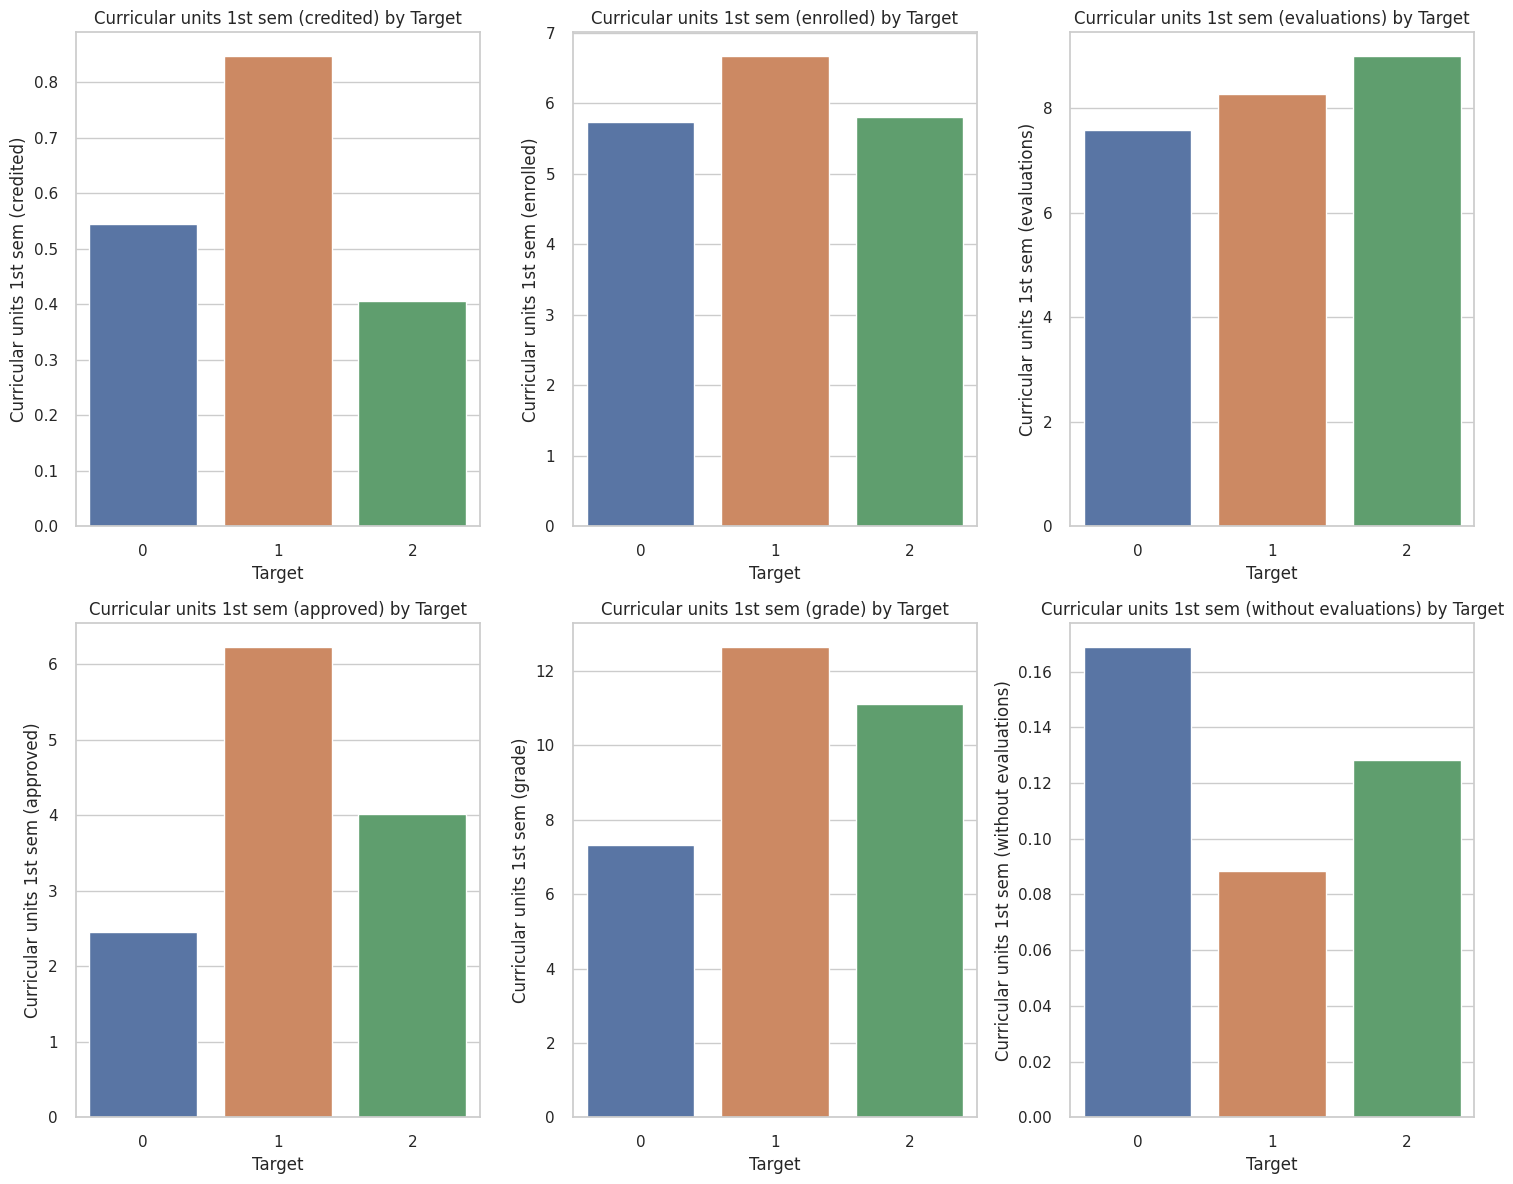

In [ ]:
# Grouped bar plot for Curricular units 1st sem variables and Target
curricular_units = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)"
]
target_classes = df["Target"].unique()

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, curricular_unit in enumerate(curricular_units):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x="Target", y=curricular_unit, data=df_resampled, ci=None)
    plt.xlabel("Target")
    plt.ylabel(curricular_unit)
    plt.title(f"{curricular_unit} by Target")

plt.tight_layout()
plt.show()


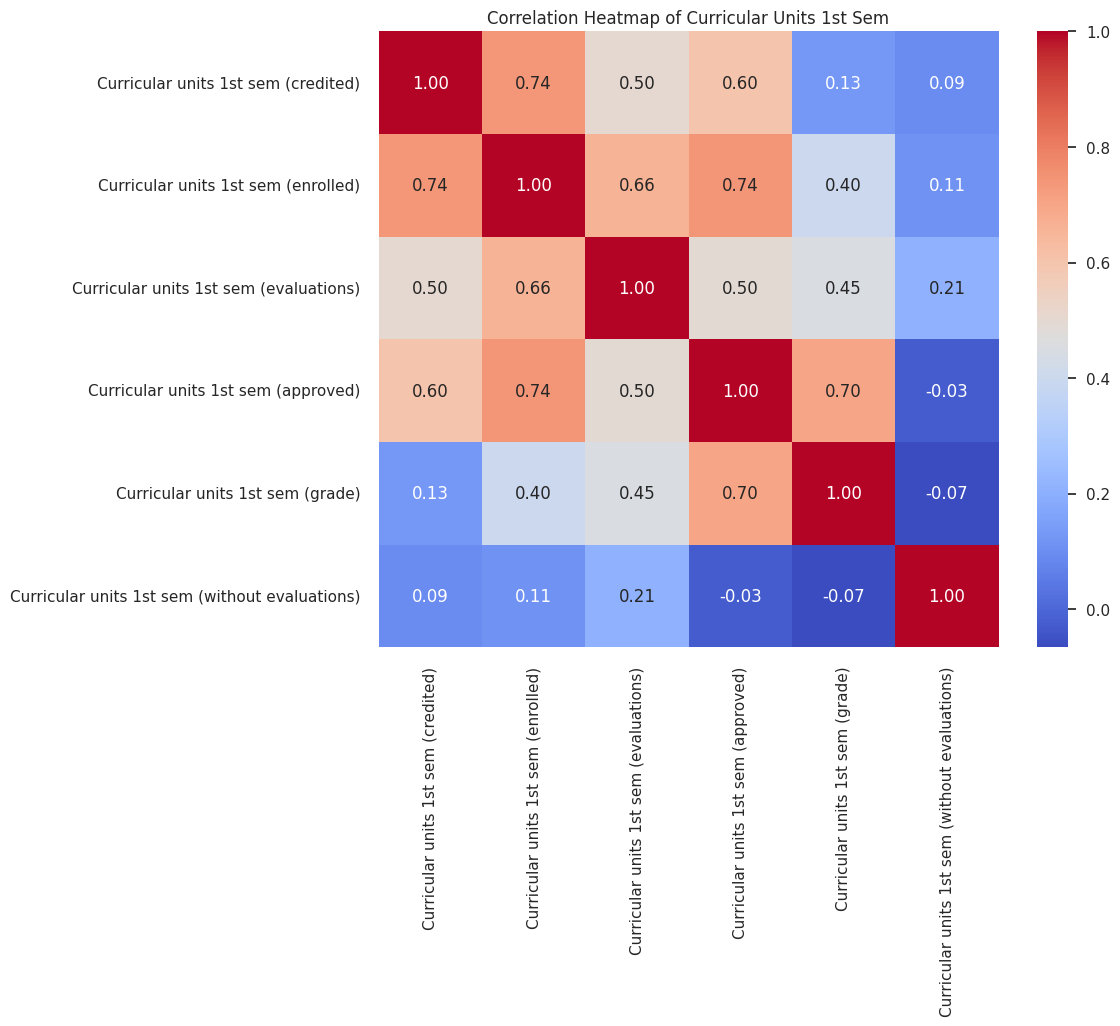

In [ ]:
# Compute the correlation matrix
corr_matrix = df_resampled[curricular_units].corr()

# Generate the annotated heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Curricular Units 1st Sem")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

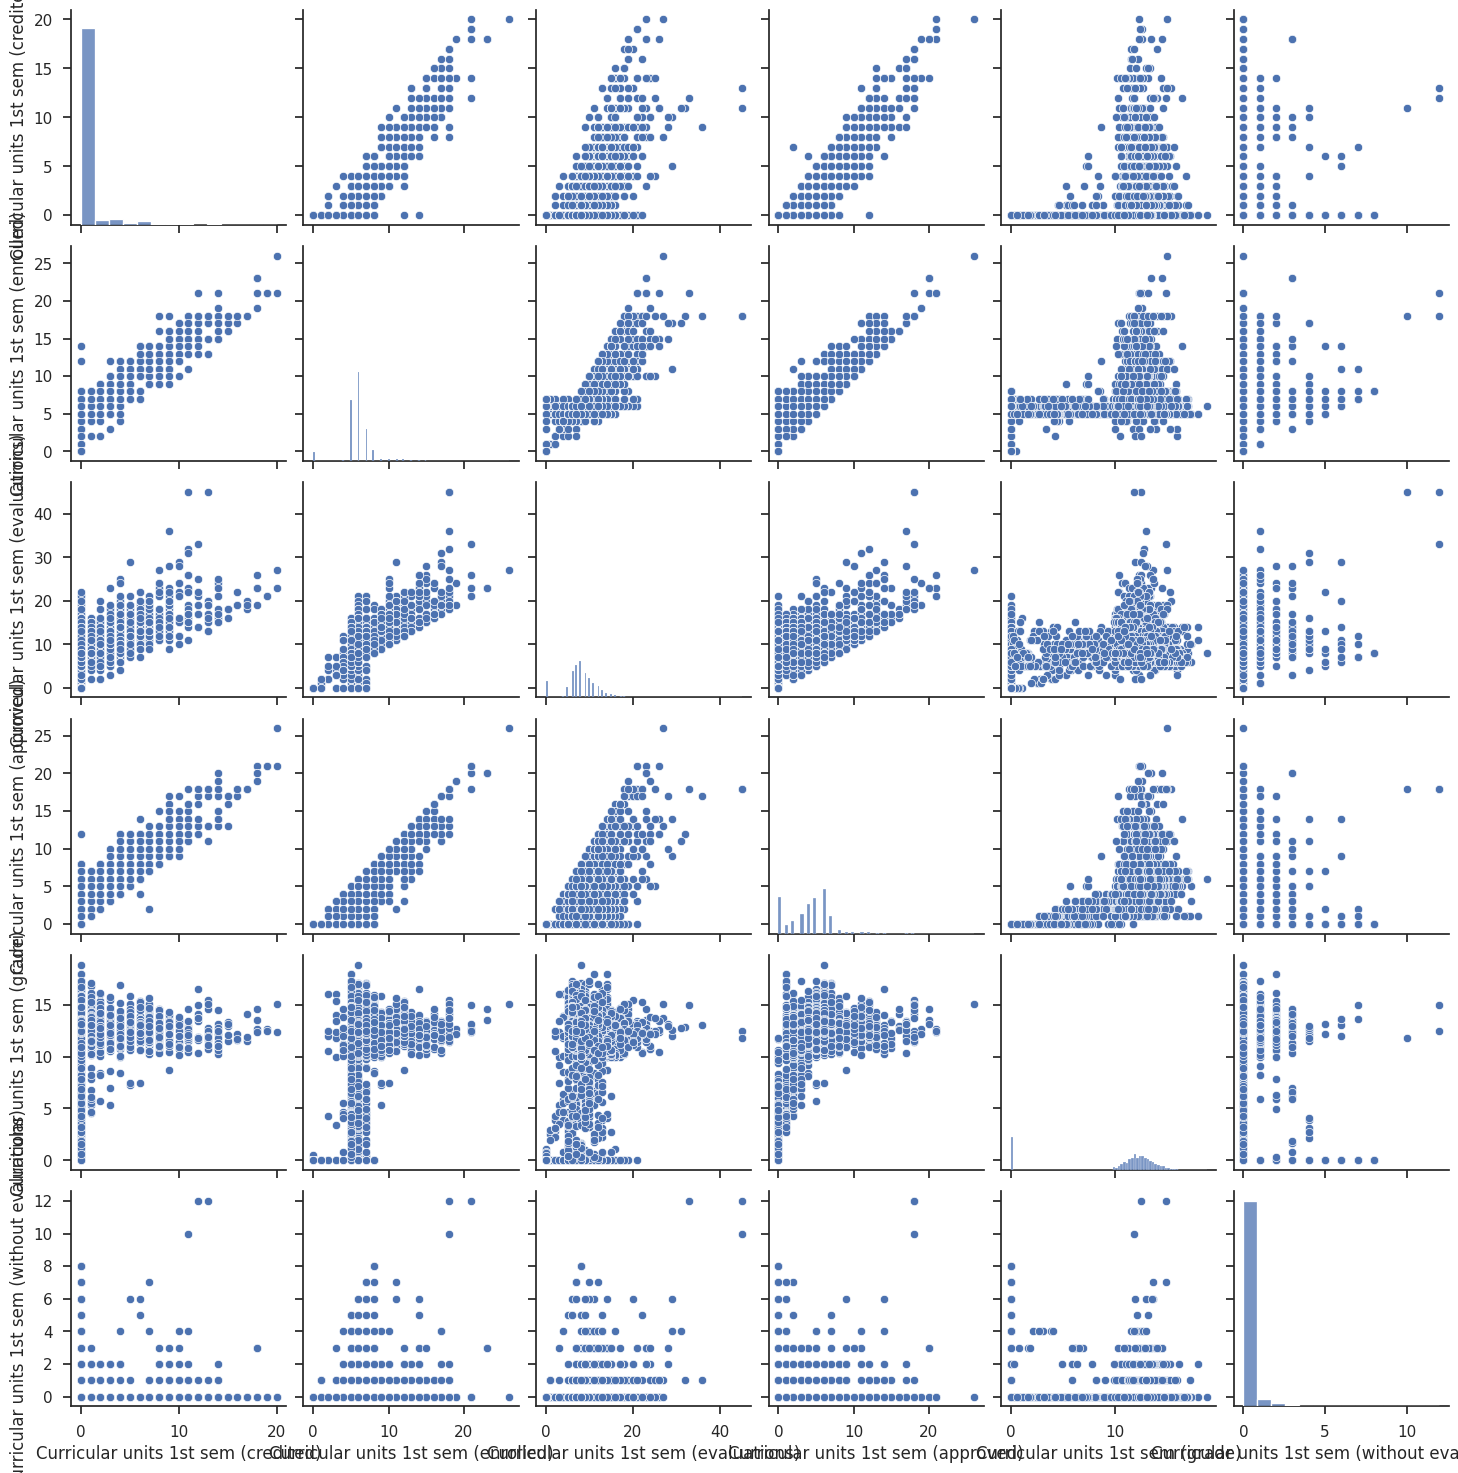

In [ ]:
# Create the scatterplot matrix
sns.set(style="ticks")
sns.pairplot(df_resampled[curricular_units])
plt.show()

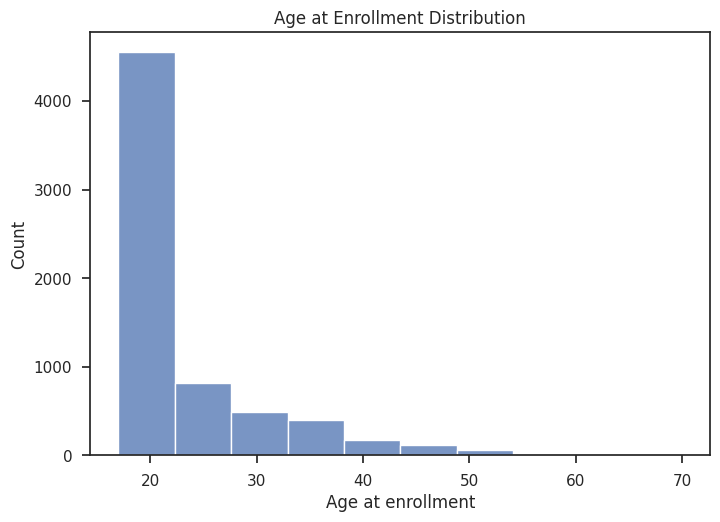

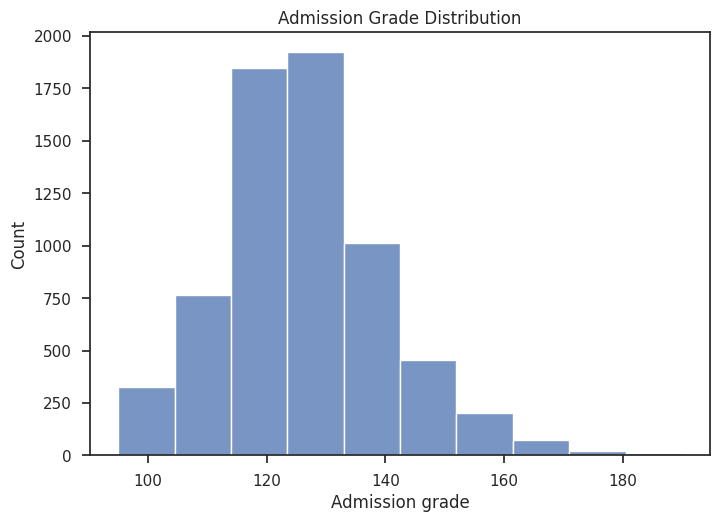

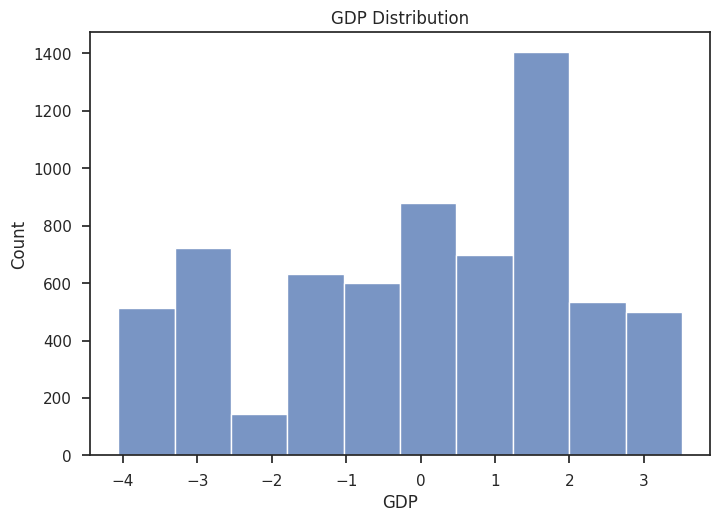

In [ ]:
# Histogram
sns.histplot(data=df_resampled, x="Age at enrollment", bins=10)
plt.title("Age at Enrollment Distribution")
plt.show()

sns.histplot(data=df_resampled, x="Admission grade", bins=10)
plt.title("Admission Grade Distribution")
plt.show()

sns.histplot(data=df_resampled, x="GDP", bins=10)
plt.title("GDP Distribution")
plt.show()



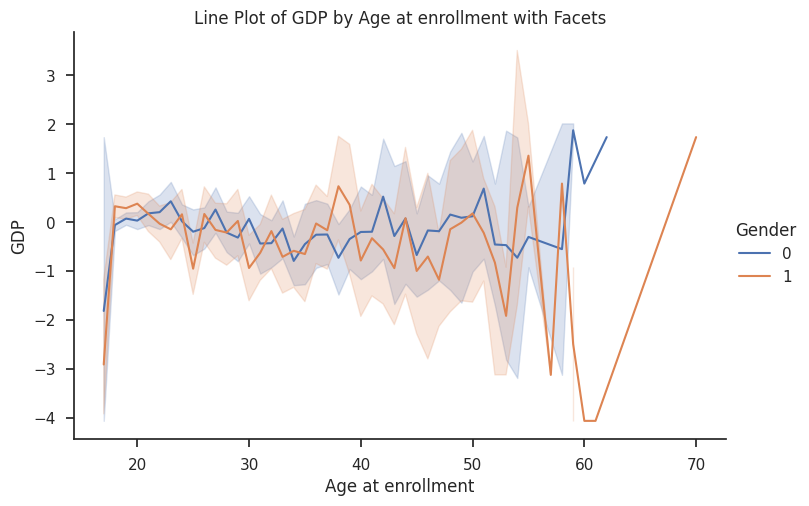

In [ ]:
# Define the variables for the line plots
x_var = "Age at enrollment"
y_var = "GDP"
facet_var = "Gender"

# Create line plots on multiple facets
sns.relplot(data=df_resampled, x=x_var, y=y_var, hue=facet_var, kind="line", height=5, aspect=1.5)

# Set labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Line Plot of {} by {} with Facets".format(y_var, x_var))

# Display the plot
plt.show()


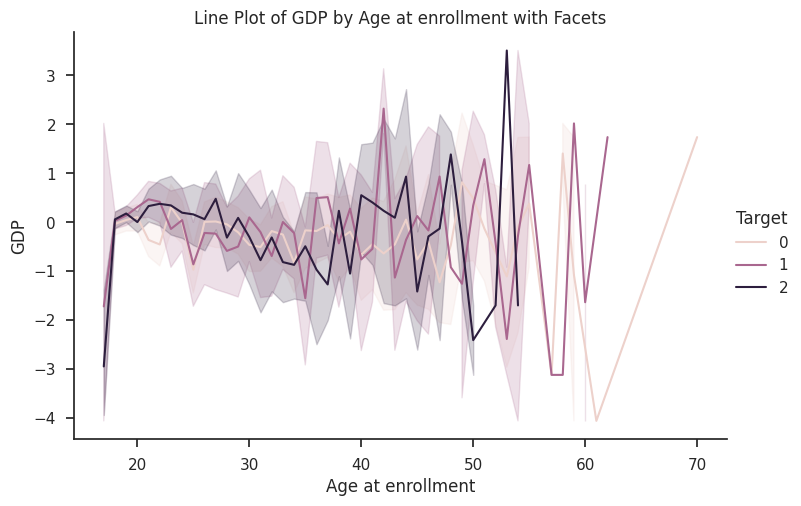

In [ ]:
# Define the variables for the line plots
x_var = "Age at enrollment"
y_var = "GDP"
facet_var = "Target"

# Create line plots on multiple facets
sns.relplot(data=df_resampled, x=x_var, y=y_var, hue=facet_var, kind="line", height=5, aspect=1.5)

# Set labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Line Plot of {} by {} with Facets".format(y_var, x_var))

# Display the plot
plt.show()


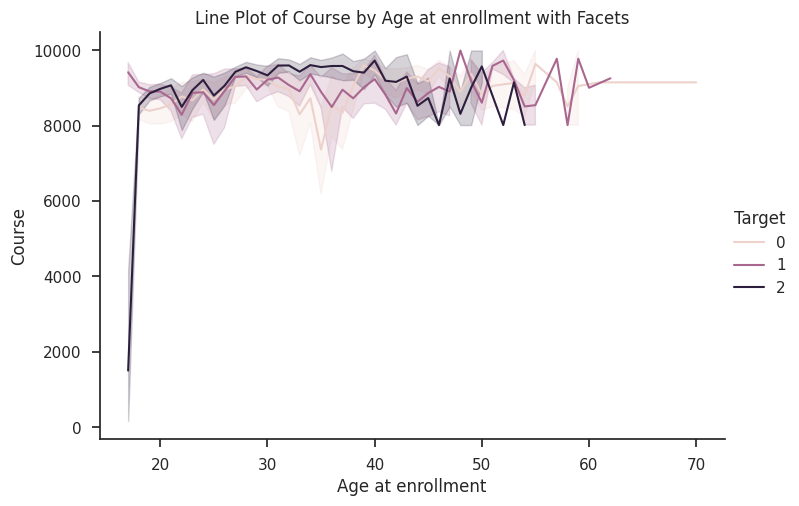

In [ ]:
# Define the variables for the line plots
x_var = "Age at enrollment"
y_var = "Course"
facet_var = "Target"

# Create line plots on multiple facets
sns.relplot(data=df_resampled, x=x_var, y=y_var, hue=facet_var, kind="line", height=5, aspect=1.5)

# Set labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Line Plot of {} by {} with Facets".format(y_var, x_var))

# Display the plot
plt.show()

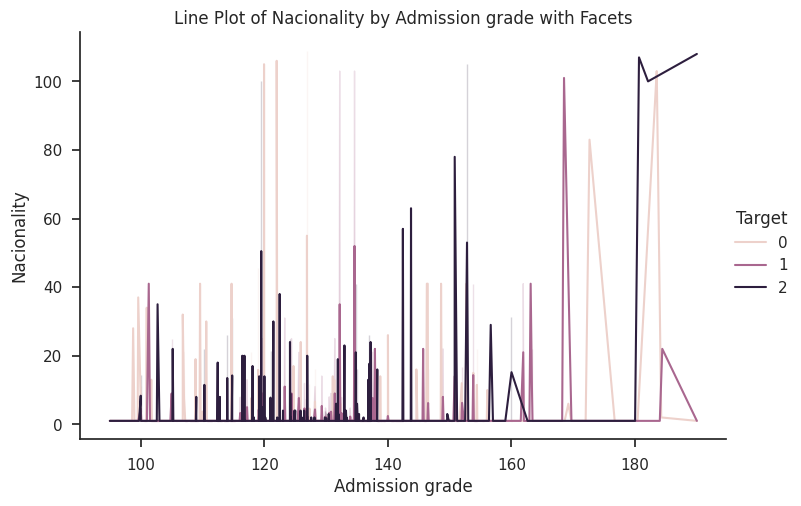

In [ ]:
# Define the variables for the line plots
x_var = "Admission grade"
y_var = "Nacionality"
facet_var = "Target"

# Create line plots on multiple facets
sns.relplot(data=df_resampled, x=x_var, y=y_var, hue=facet_var, kind="line", height=5, aspect=1.5)

# Set labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Line Plot of {} by {} with Facets".format(y_var, x_var))

# Display the plot
plt.show()

#Compare two features w.r.t Target variable

In [ ]:
columns=['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)',
                     'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Marital status', 'Application mode', 'Application order', 'Course',
                       'Previous qualification', 'Nacionality', "Mother's qualification",
                       "Father's qualification", "Mother's occupation", "Father's occupation",
                       'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
                       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
                       'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                       'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                       'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                       'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                       'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                       'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

In [ ]:
def comp(x) :

    fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,11))
    col=columns.copy()
    col.remove(x)
    for i in range(4):
        plt.subplot(2,2,i+1)
        sns.lineplot(data = df_resampled,x =col[i] ,y = x,hue = 'Target',palette=colors2,linewidth = 4)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        title = x + ' x ' + col[i] + ' vs Target'
        plt.title(title);
    title2 = x + ' vs other feature'
    plt.suptitle(title2)

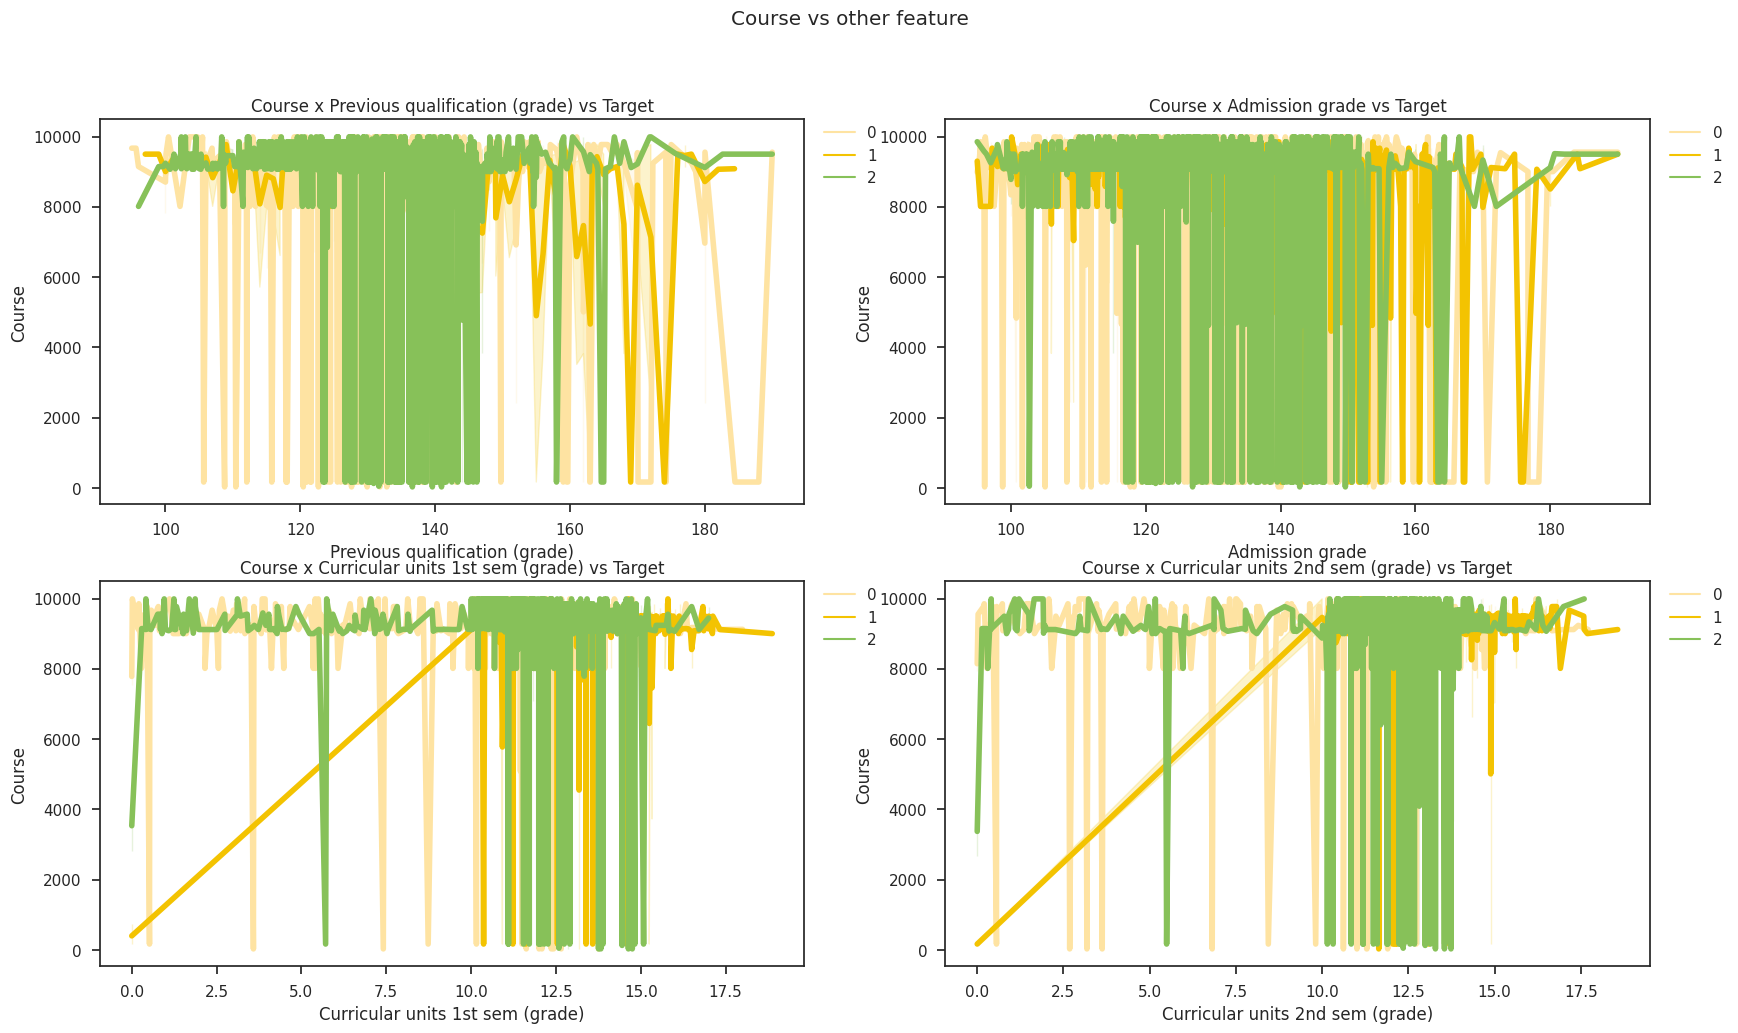

In [ ]:
comp('Course')

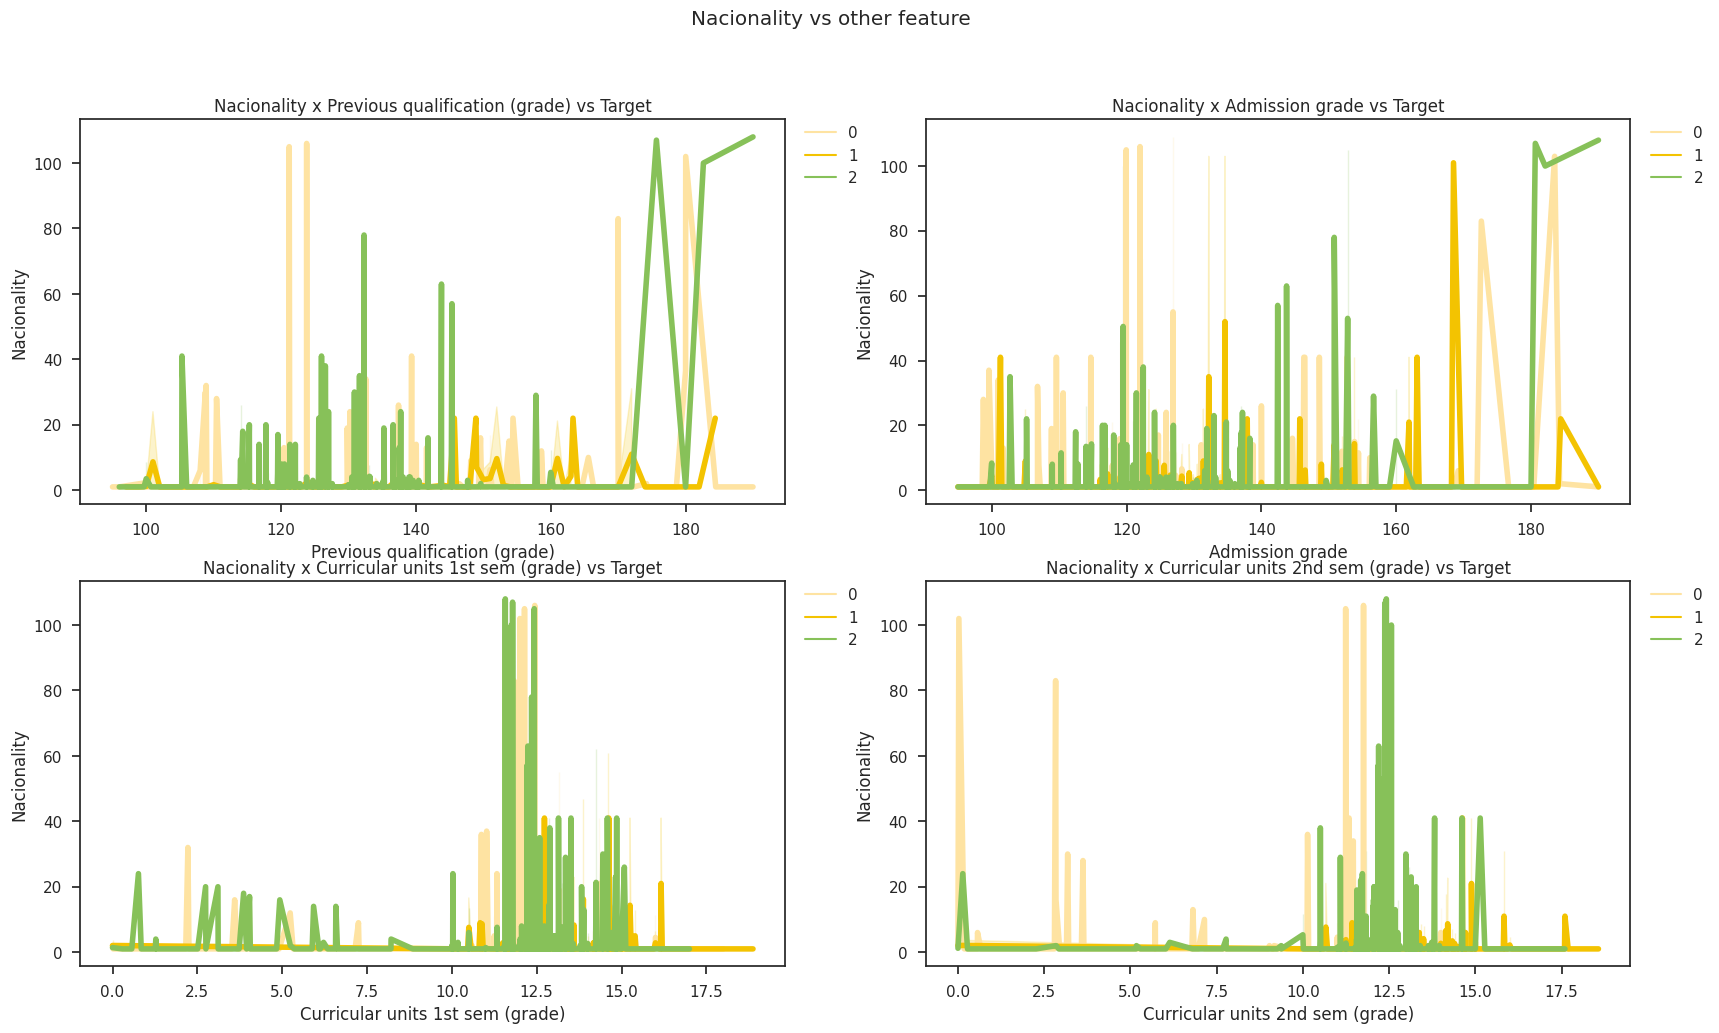

In [ ]:
comp('Nacionality')

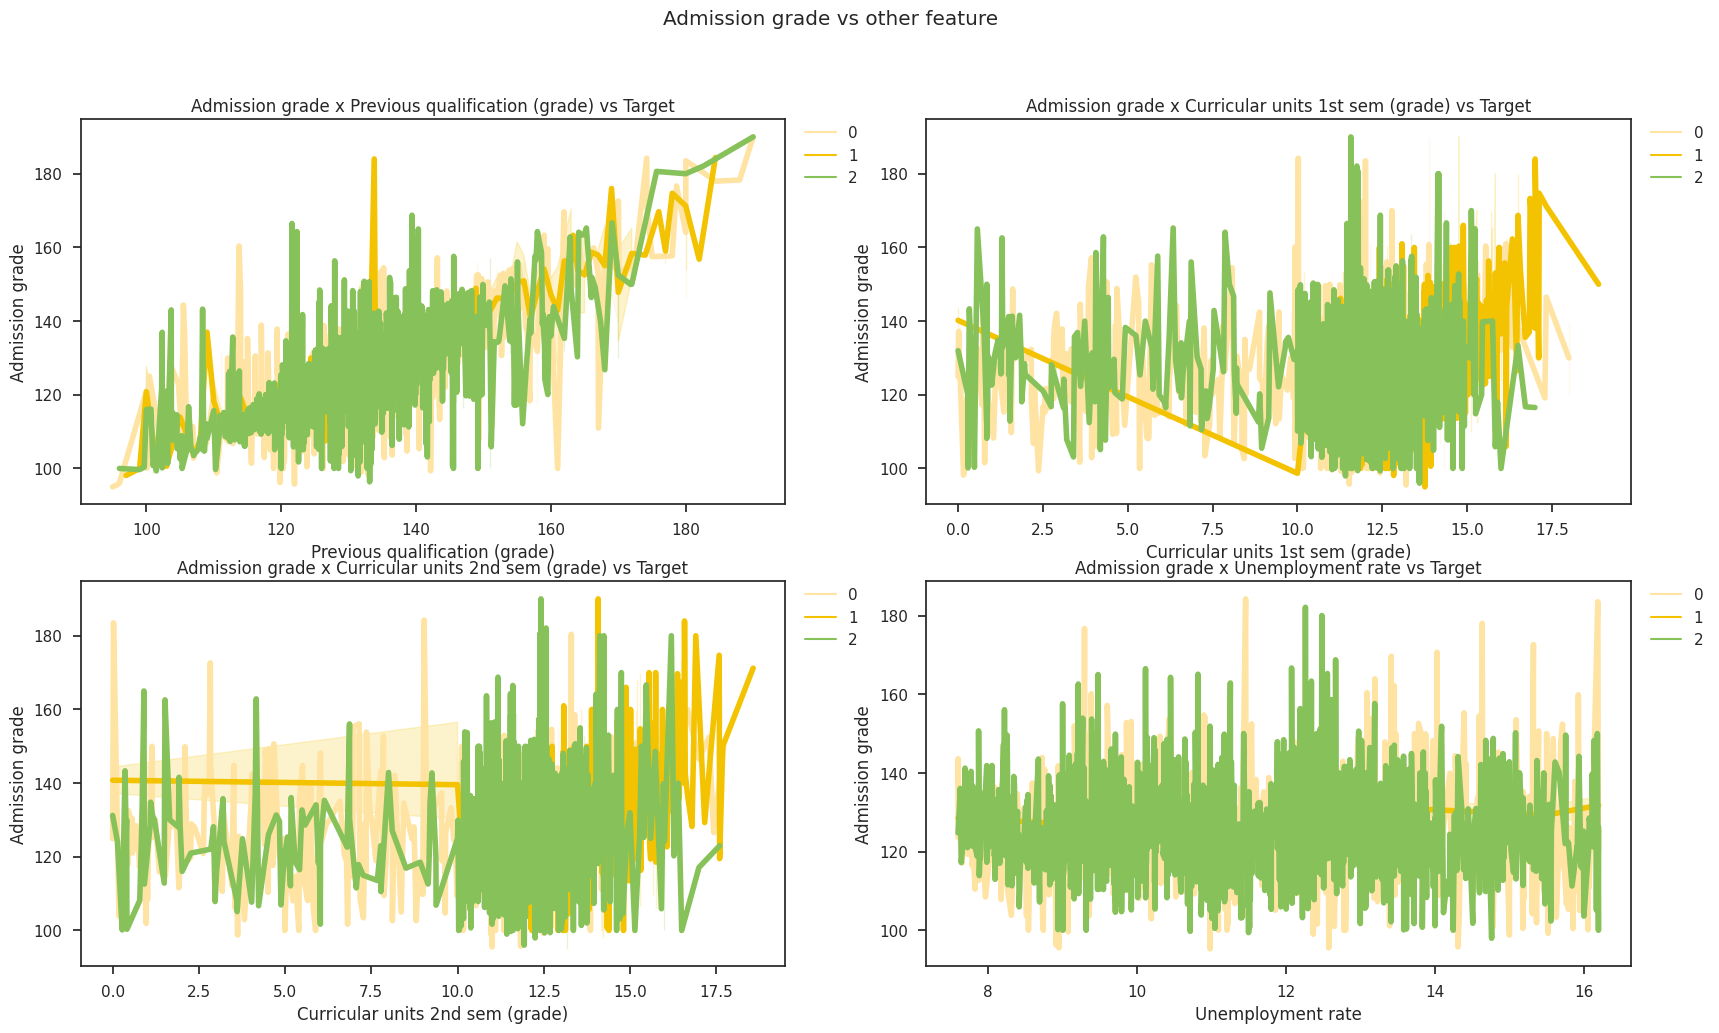

In [ ]:
comp('Admission grade')

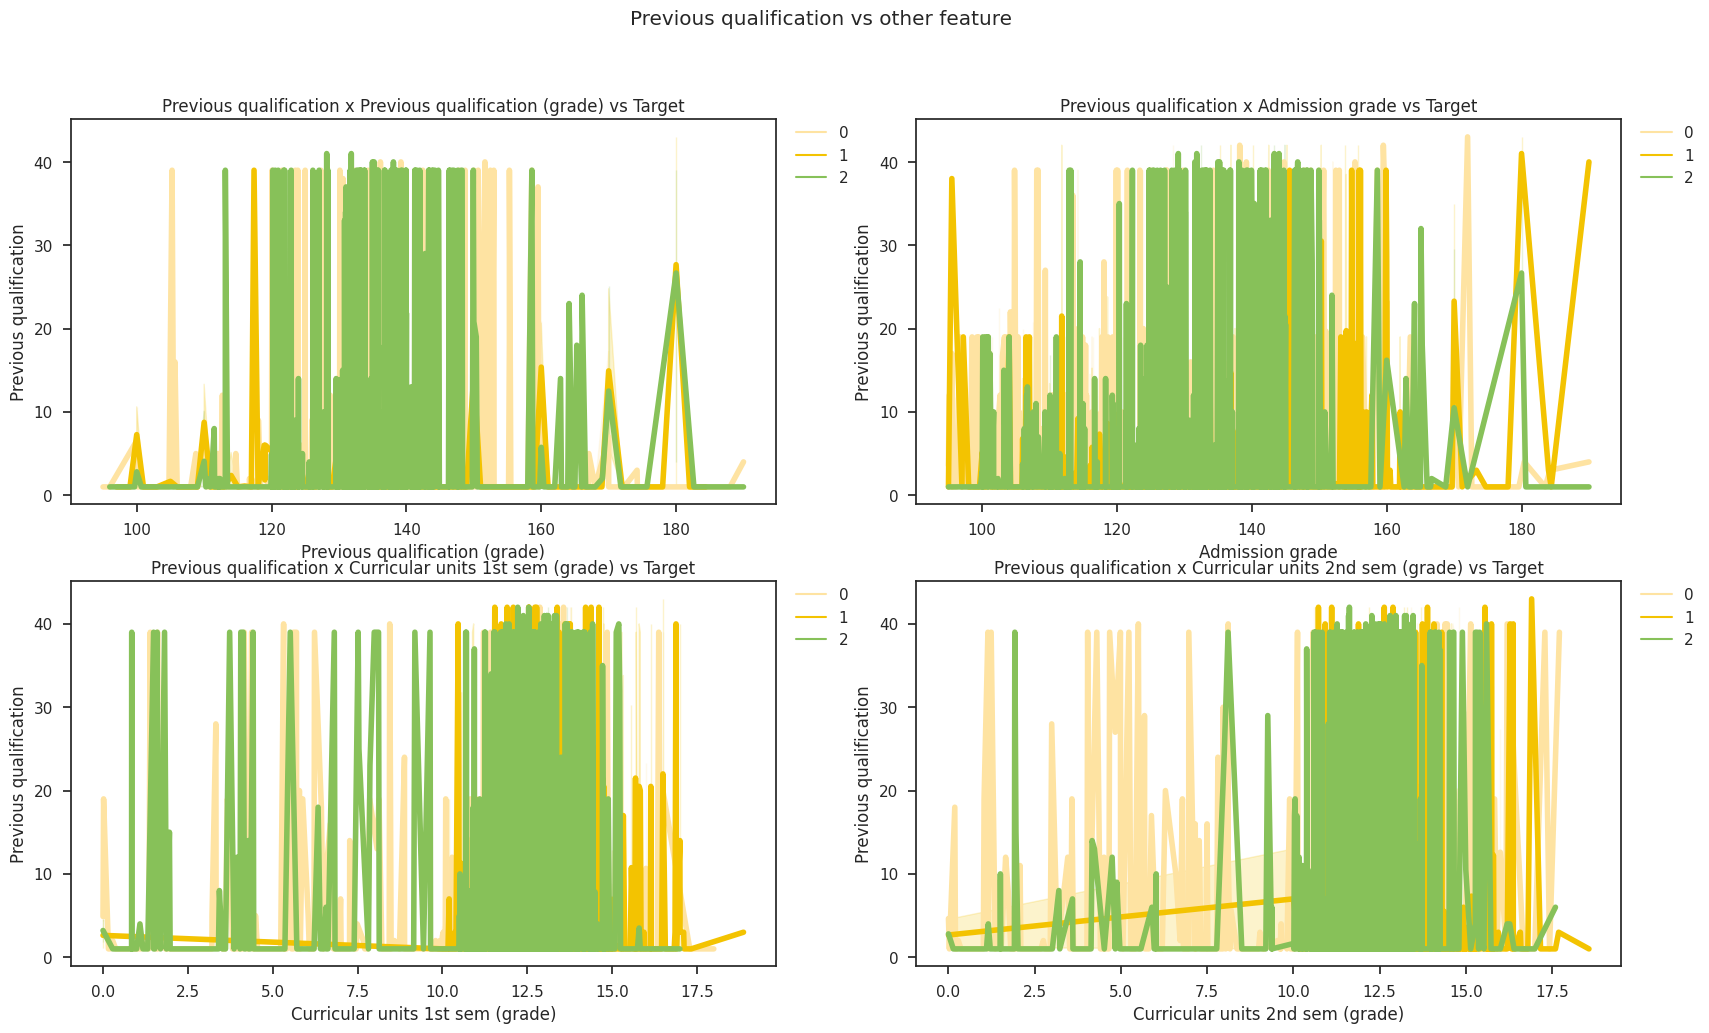

In [ ]:
comp('Previous qualification')

In [ ]:
Relation = df_resampled.groupby(['Nacionality','Age at enrollment'])['Course','Target'].mean().reset_index()
Relation=Relation.sort_values(by=['Target'],ascending=False).reset_index(drop=True).head(10)
Relation

,Nacionality,Age at enrollment,Course,Target
0,20,22,9543.0,2.0
1,5,22,9132.0,2.0
2,19,20,9147.0,2.0
3,18,20,9591.0,2.0
4,17,20,9556.0,2.0
5,16,19,9556.0,2.0
6,14,24,9530.0,2.0
7,8,19,9186.5,2.0
8,6,24,9003.0,2.0
9,6,22,9085.0,2.0


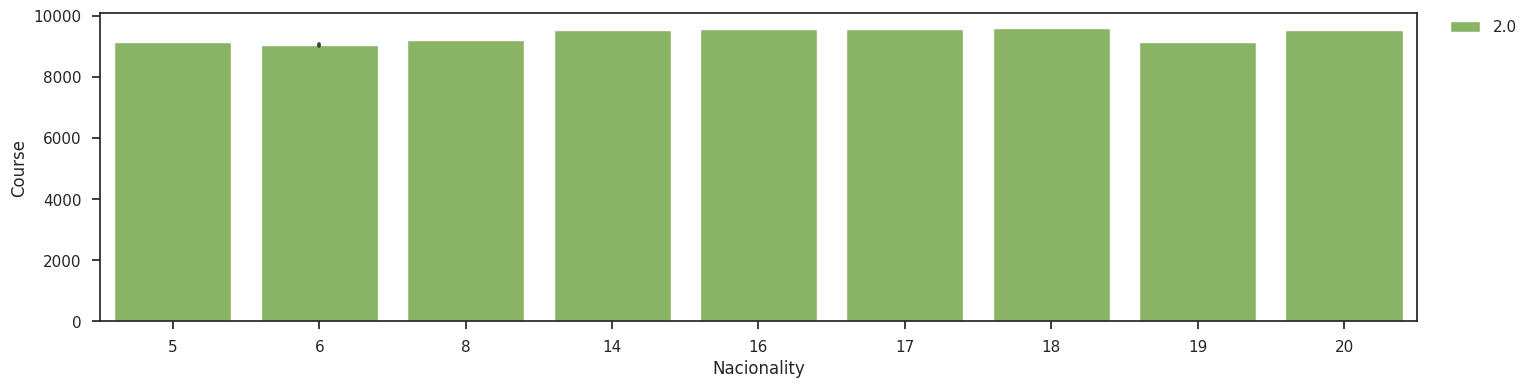

In [ ]:
plt.figure(figsize=(17,4))
sns.barplot(data = Relation,x = 'Nacionality',y = 'Course',hue = 'Target',palette=colors2[2:4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#Feature Engineering

In [7]:
FE=df_resampled.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in FE.columns:
    if FE[col].dtype=='object':
        FE[col]=le.fit_transform(FE[col])

#Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler() # Normalization

# Normalization
FE['Age at enrollment'] = mms.fit_transform(FE[['Age at enrollment']])
FE['Course'] = mms.fit_transform(FE[['Course']])

In [11]:
FE['Target']=FE['Target'].round(0)
FE['Target']=FE['Target'].astype(int)

#Correlation

<Axes: >

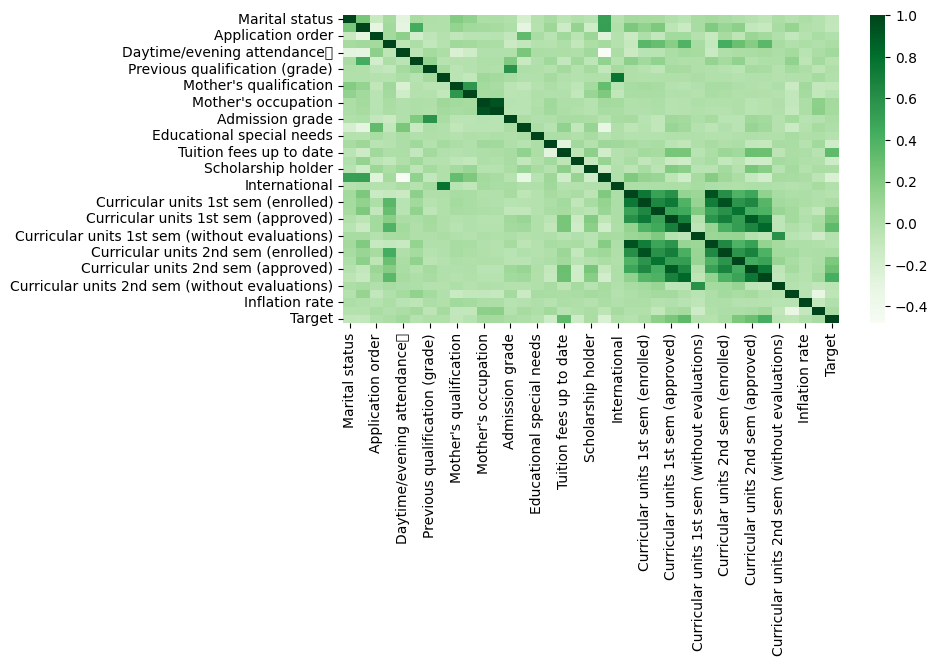

In [ ]:
corr = FE.corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="Greens", annot=False)

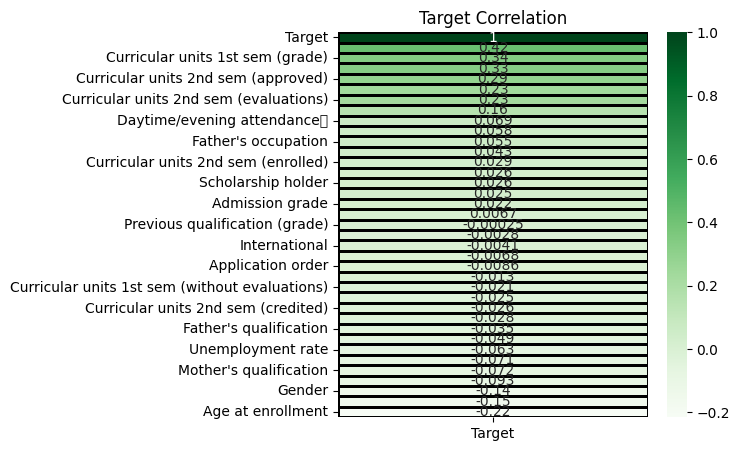

In [ ]:
corr = FE.corrwith(FE['Target']).sort_values(ascending = False).to_frame()
corr.columns = ['Target']

plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'Greens',linewidths =2,linecolor = 'black');

plt.title('Target Correlation');

#Model

In [ ]:
%%capture
!pip install pycaret

In [ ]:
from pycaret.regression import *
s = setup(data=df_resampled, target='Target', session_id=123, normalize=True,fold = 3, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Regression
3,Original data shape,"(6627, 37)"
4,Transformed data shape,"(6395, 37)"
5,Transformed train set shape,"(4406, 37)"
6,Transformed test set shape,"(1989, 37)"
7,Numeric features,36
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3750,0.3057,0.5527,0.5434,0.3150,0.1981,1.7567
lightgbm,Light Gradient Boosting Machine,0.3998,0.3133,0.5596,0.5321,0.3158,0.2229,0.6333
rf,Random Forest Regressor,0.4056,0.3316,0.5757,0.5046,0.3272,0.2123,3.7300
xgboost,Extreme Gradient Boosting,0.4134,0.3347,0.5784,0.5000,0.3256,0.2408,0.7600
gbr,Gradient Boosting Regressor,0.4746,0.3827,0.6185,0.4284,0.3461,0.2588,1.2667
knn,K Neighbors Regressor,0.4681,0.4479,0.6692,0.3309,0.3777,0.2576,0.2267
br,Bayesian Ridge,0.5617,0.4627,0.6802,0.3087,0.3763,0.3194,0.1367
lr,Linear Regression,0.5606,0.4631,0.6804,0.3083,0.3763,0.3195,3.1200
ridge,Ridge Regression,0.5606,0.4631,0.6804,0.3083,0.3763,0.3195,0.1700
ada,AdaBoost Regressor,0.5642,0.4683,0.6841,0.3006,0.3799,0.2932,0.3233


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
tuned_model=tune_model(best, n_iter =10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5176,0.4077,0.6385,0.3875,0.3479,0.2810
1,0.5407,0.4397,0.6631,0.3506,0.3779,0.2792
2,0.5184,0.4102,0.6405,0.3835,0.3536,0.2784
Mean,0.5256,0.4192,0.6473,0.3739,0.3598,0.2795
Std,0.0107,0.0145,0.0111,0.0166,0.0130,0.0011


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


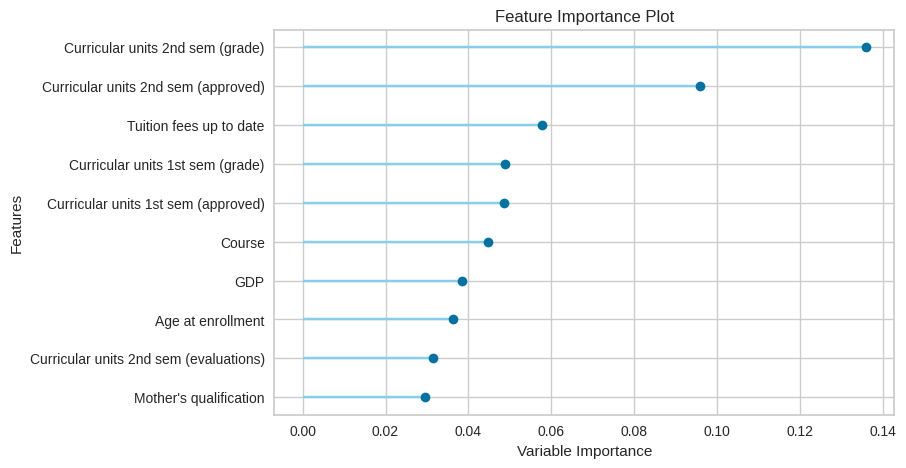

In [ ]:
plot_model(tuned_model, plot='feature')

# Split the data into features (X) and target variable (y)

In [12]:
X = df_resampled.drop("Target", axis=1)
y = df_resampled["Target"]

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

(5301, 36) (5301,)


#Scale the features for better model performance

In [14]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Classification algorithms:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K-nearest Neighbors (KNN)
5. Bayesian Classifier

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test_scaled)

logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average='macro')
logreg_recall = recall_score(y_test, logreg_pred, average='macro')
logreg_f1 = f1_score(y_test, logreg_pred, average='macro')

print("Logistic Regression:")
print("Accuracy: {:.2f}%".format(logreg_accuracy * 100))
print("Precision: {:.2f}%".format(logreg_precision * 100))
print("Recall: {:.2f}%".format(logreg_recall * 100))
print("F1-score: {:.2f}%".format(logreg_f1 * 100))
print()

Logistic Regression:
Accuracy: 61.31%
Precision: 62.72%
Recall: 61.23%
F1-score: 59.34%



[]

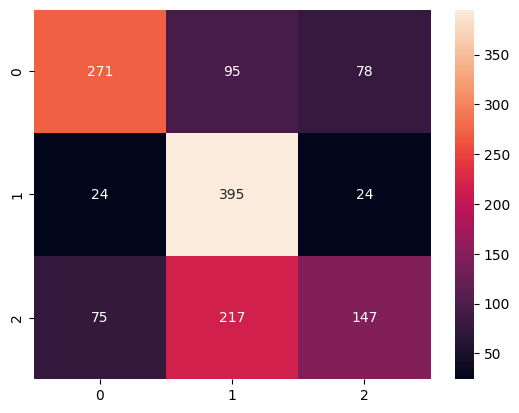

In [33]:
from sklearn.metrics import confusion_matrix
con= confusion_matrix(y_test, logreg_pred)
sns.heatmap(con,annot=True, fmt ='d')
plt.plot()

In [20]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='macro')
dt_recall = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

print("Decision Trees:")
print("Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Precision: {:.2f}%".format(dt_precision * 100))
print("Recall: {:.2f}%".format(dt_recall * 100))
print("F1-score: {:.2f}%".format(dt_f1 * 100))
print()

Decision Trees:
Accuracy: 71.57%
Precision: 71.60%
Recall: 71.56%
F1-score: 71.58%



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

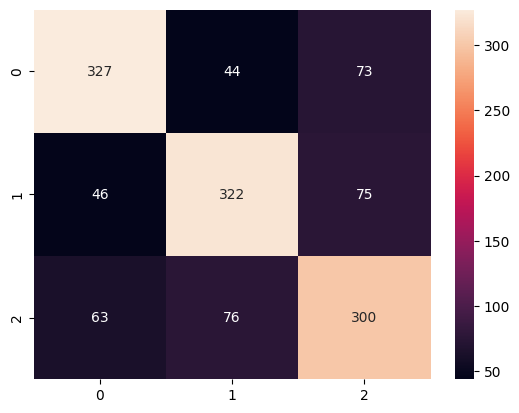

In [34]:
from sklearn.metrics import confusion_matrix
con= confusion_matrix(y_test, dt_pred)
sns.heatmap(con,annot=True, fmt ='d')
plt.plot

In [36]:
# Random Forests
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print("Random Forests:")
print("Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Precision: {:.2f}%".format(rf_precision * 100))
print("Recall: {:.2f}%".format(rf_recall * 100))
print("F1-score: {:.2f}%".format(rf_f1 * 100))
print()


Random Forests:
Accuracy: 81.60%
Precision: 81.96%
Recall: 81.59%
F1-score: 81.61%



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

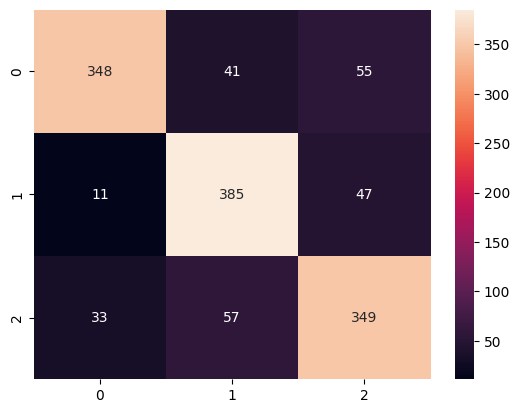

In [37]:
from sklearn.metrics import confusion_matrix
con= confusion_matrix(y_test, rf_pred)
sns.heatmap(con,annot=True, fmt ='d')
plt.plot

In [22]:
# K-nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print("K-nearest Neighbors (KNN):")
print("Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("Precision: {:.2f}%".format(knn_precision * 100))
print("Recall: {:.2f}%".format(knn_recall * 100))
print("F1-score: {:.2f}%".format(knn_f1 * 100))
print()

K-nearest Neighbors (KNN):
Accuracy: 73.53%
Precision: 74.03%
Recall: 73.54%
F1-score: 73.62%



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

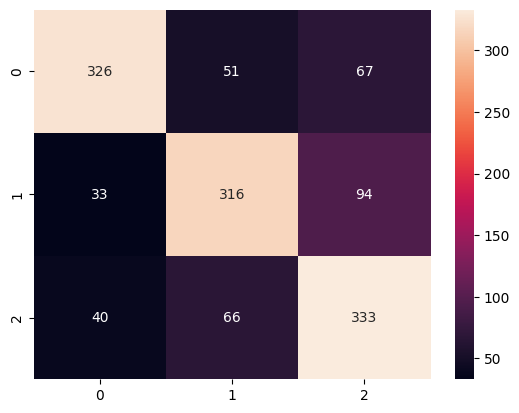

In [38]:
from sklearn.metrics import confusion_matrix
con= confusion_matrix(y_test, knn_pred)
sns.heatmap(con,annot=True, fmt ='d')
plt.plot

In [25]:
# Bayesian Classifier
bayes = GaussianNB()
bayes.fit(X_train_scaled, y_train)
bayes_pred = bayes.predict(X_test_scaled)

bayes_accuracy = accuracy_score(y_test, bayes_pred)
bayes_precision = precision_score(y_test, bayes_pred, average='macro')
bayes_recall = recall_score(y_test, bayes_pred, average='macro')
bayes_f1 = f1_score(y_test, bayes_pred, average='macro')

print("Bayesian Classifier:")
print("Accuracy: {:.2f}%".format(bayes_accuracy * 100))
print("Precision: {:.2f}%".format(bayes_precision * 100))
print("Recall: {:.2f}%".format(bayes_recall * 100))
print("F1-score: {:.2f}%".format(bayes_f1 * 100))
print()

Bayesian Classifier:
Accuracy: 65.69%
Precision: 66.43%
Recall: 65.68%
F1-score: 65.88%



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

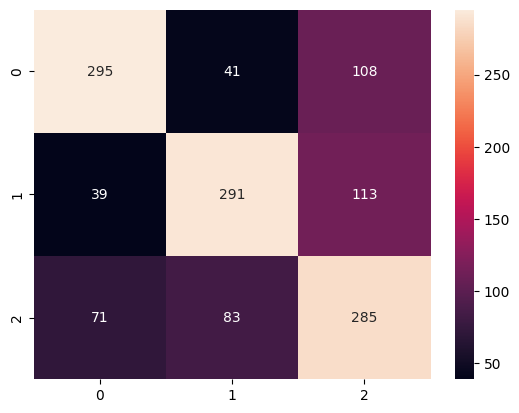

In [39]:
from sklearn.metrics import confusion_matrix
con= confusion_matrix(y_test, bayes_pred)
sns.heatmap(con,annot=True, fmt ='d')
plt.plot